# Import Libraries and Packages


In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
## get the data
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip

In [44]:
#!unzip concrete_data_week2.zip

In [45]:
os.listdir('./resources/data')

['concrete_crack_images_for_classification.zip', 'Negative', 'Positive']

## Construct an ImageDataGenerator Instance

In this section, you will learn how to define a Keras ImageDataGenerator instance and use it to load and manipulate data for building a deep learning model.


In [46]:
dataset_dir = './resources/data'

Keras ImageDataGenerator requires images be arranged in a certain folder hierchy, where the main directory would contain folders equal to the number of classes in your problem. Since in ths case we are trying to build a classifier of two classes, then our main directory which is `resources/data` should contain two folders, one for each class. This has already been done for you as the negative images are in one folder and the positive images are in another folder.

Let's go ahead and define an instance of the Keras ImageDataGenerator.

Standard ImageDataGenerator

You can define a standard on like this, where you are simply using the ImageDataGenerator to train your model in batches.

In [47]:
data_generator = ImageDataGenerator()

Next, you use the `flow_from_directory` methods to loop through the images in batches. In this method , you pass the directory where the images reside, the size of each batch, *batch_size*, and since batches are sampled randomly, then you can also specify a random seed, *seed*, if you would like to repreduce the batch sampling. In case you would like to resize you images, then you can using the *target_size* argument to accomplish that.

In [48]:
image_generator = data_generator.flow_from_directory (
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24)

Found 40000 images belonging to 2 classes.


What is great about this method, is it prints a summary of what it found in the directory passed. Here, it found 40000 images in total belonging to 2 classes.

Now to access the batches, you use the `next` method as follows:

In [50]:
first_batch = image_generator.next()
first_batch

(array([[[[172., 174., 169.],
          [176., 178., 173.],
          [181., 183., 178.],
          ...,
          [157., 159., 154.],
          [156., 158., 153.],
          [154., 156., 151.]],
 
         [[170., 172., 167.],
          [172., 174., 169.],
          [174., 176., 171.],
          ...,
          [155., 157., 152.],
          [154., 156., 151.],
          [153., 155., 150.]],
 
         [[169., 171., 166.],
          [167., 169., 164.],
          [166., 168., 163.],
          ...,
          [152., 154., 149.],
          [152., 154., 149.],
          [151., 153., 148.]],
 
         ...,
 
         [[153., 154., 148.],
          [155., 156., 150.],
          [158., 159., 153.],
          ...,
          [143., 144., 138.],
          [144., 145., 139.],
          [145., 146., 140.]],
 
         [[147., 148., 142.],
          [150., 151., 145.],
          [153., 154., 148.],
          ...,
          [142., 143., 137.],
          [143., 144., 138.],
          [144., 145., 139.

#### Custom ImageDataGenerator

You can also specify some transforms, like scaling, rotations, and flips, that you would like applied to the images when you define an ImageDataGenerator object. Say you want to normalize your images, then you can define  your ImageDataGenerator instance as follows:

In [51]:
data_generator = ImageDataGenerator (rescale = 1./255)

And then you proceed with defining your *image_generator* using the *flow_from_directory* method, just like before.

In [52]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size = 4,
    class_mode='categorical',
    seed=24
)

Found 40000 images belonging to 2 classes.


In [53]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

## Visualize Batches of Images

Let's write some code to visualize a batch. We will use subplots in order to make visualizing the images easier.

Recall that we can access our batch images as follows:

`first_batch_images = image_generator.next()[0]`
`second_batch_images = image_genrator.next()[0]`
and so on

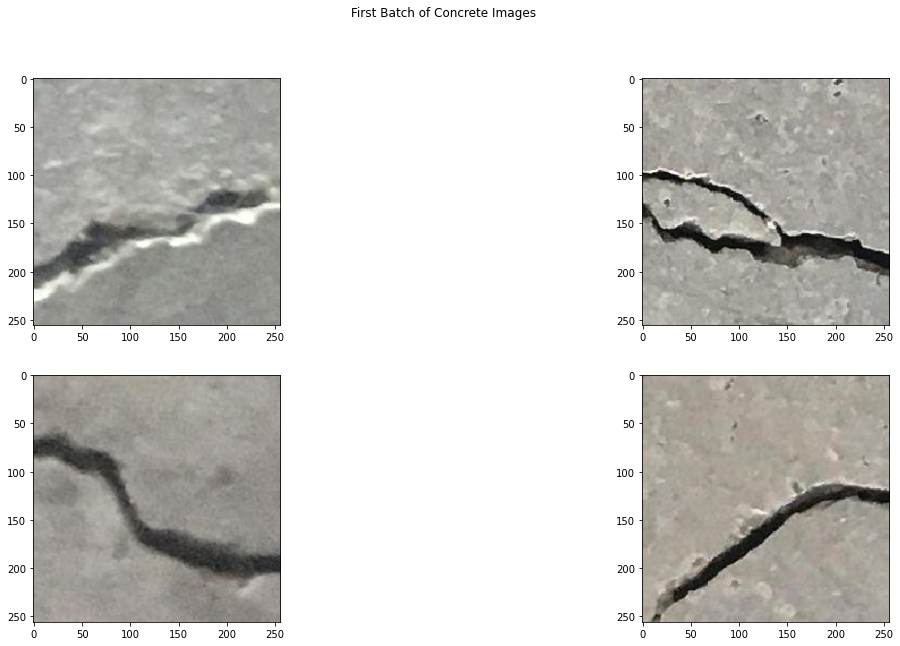

In [54]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes
first_batch_images = image_generator.next()[0]
ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

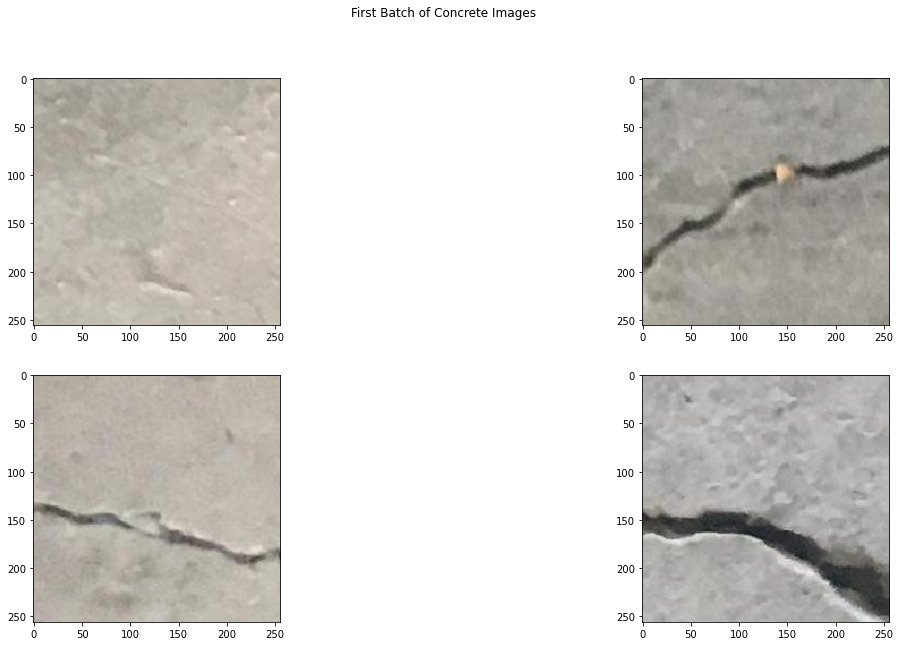

In [55]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes
first_batch_images = image_generator.next()[0]
ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

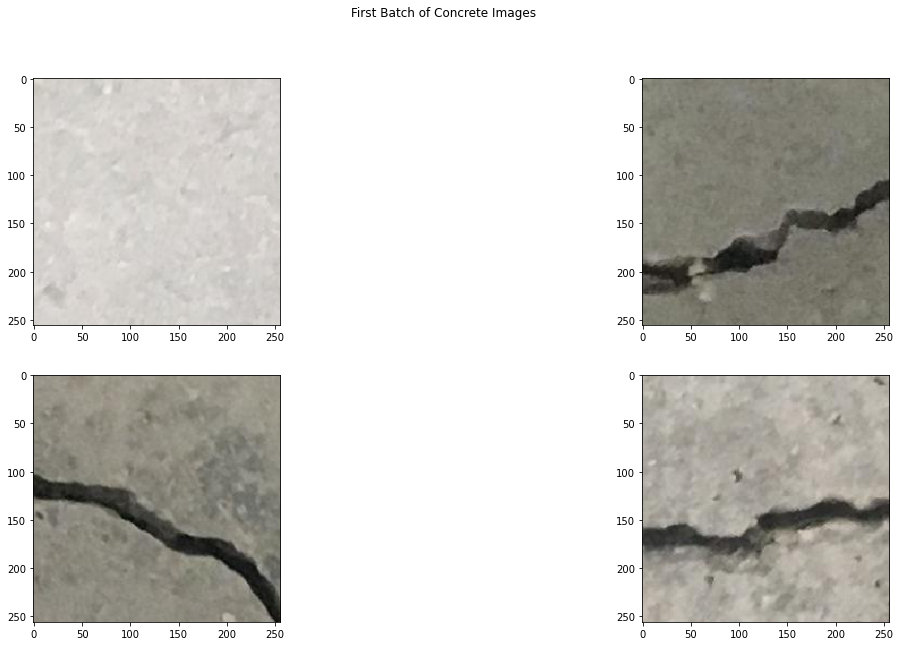

In [56]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes
first_batch_images = image_generator.next()[0]
ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

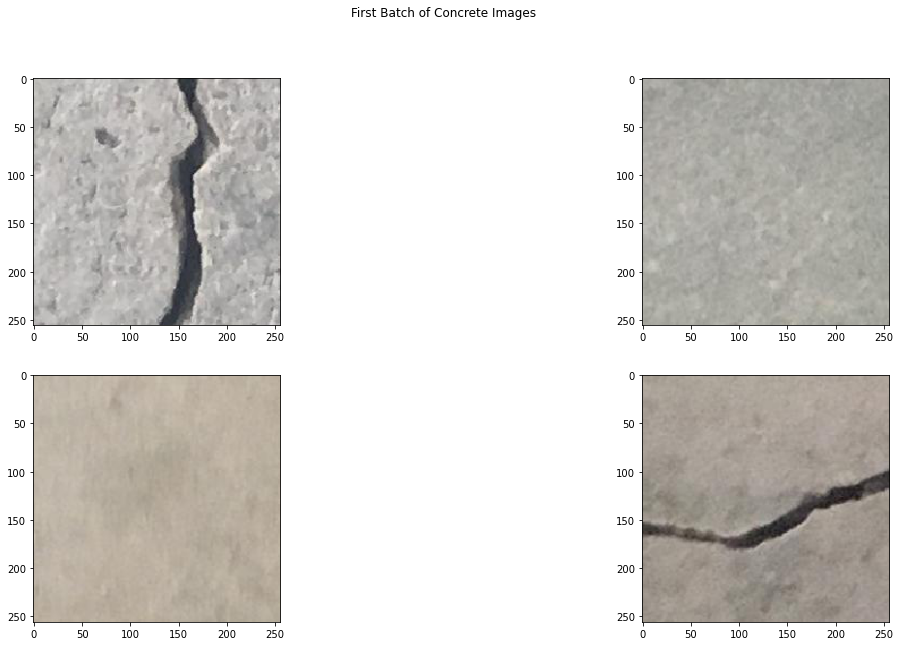

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes
first_batch_images = image_generator.next()[0]
ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

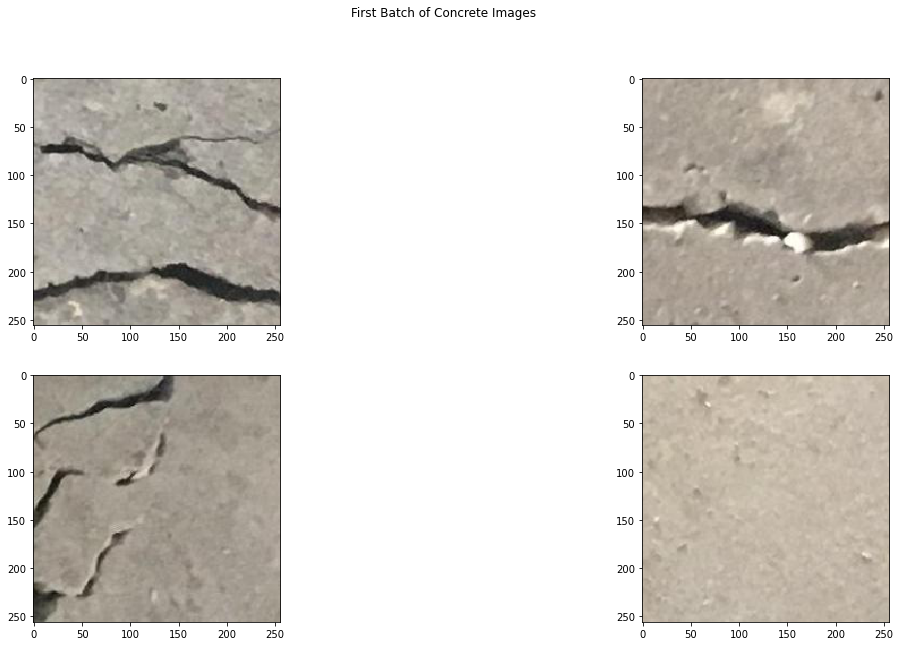

In [58]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes
first_batch_images = image_generator.next()[0]
ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

In [59]:
image_generator.next()[1]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)